In [7]:
import pandas as pd
import numpy as np
erp = pd.read_excel('C:/Users/Raskolnikov/Downloads/erp.xlsx')
erp.head()

C:\Users\Raskolnikov\anaconda3\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock


In [6]:
erp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 32.4+ KB


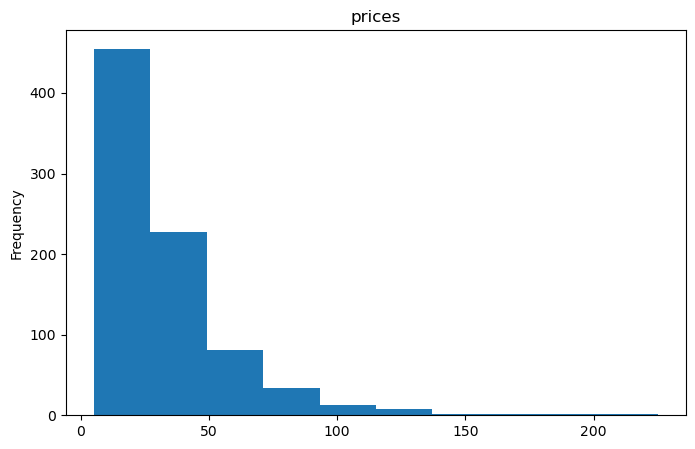

In [109]:
ax = erp.price.plot(kind='hist', figsize=(8, 5), title='prices')

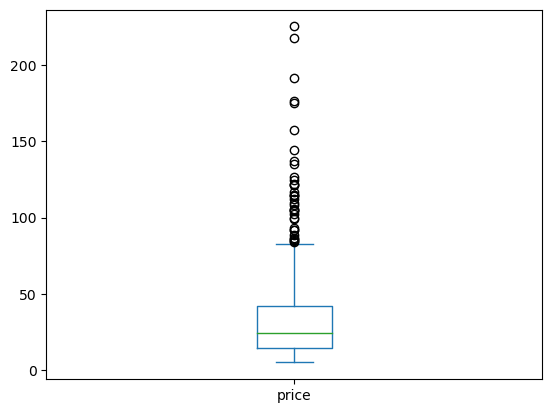

In [223]:
ax = erp.price.plot(kind='box')

In [55]:
mean=np.mean(erp.price)
mean

32.41563636363638

In [91]:
mean_max=mean*1.1
mean_max

35.657200000000024

In [92]:
mean_min=mean*0.9
mean_min

29.174072727272744

In [56]:
median=np.median(erp.price)
median

24.4

In [57]:
from scipy import stats
trim_mean=stats.trim_mean(erp.price, 0.05)
trim_mean

29.14158815612382

In [59]:
skew_pvalue=stats.skewtest(erp.price)[1]
skew_pvalue

8.594075403453784e-75

In [60]:
kurt_pvalue=stats.kurtosistest(erp.price)[1]
kurt_pvalue

8.306000464519405e-37

In [62]:
stddev=np.std(erp.price)
stddev

26.779604366935427

In [61]:
cv=stddev/mean
cv

0.8261323043769268

In [66]:
iqr=stats.iqr(erp.price)
iqr

27.4

In [68]:
outlier_max_iqr=erp.price.quantile(.75)+1.5*iqr
outlier_max_iqr

83.1

In [70]:
outlier_min_iqr=max(erp.price.quantile(.25)-1.5*iqr,0)
outlier_min_iqr

0

In [71]:
outlier_max_zscore=mean+3*stddev
outlier_max_zscore

112.75444946444266

In [73]:
outlier_min_zscore=max(mean-3*stddev,0)
outlier_min_zscore

0

In [74]:
mask_iqr=(erp.price<outlier_max_iqr)&(erp.price>=outlier_min_iqr)
mask_zscore=(erp.price<outlier_max_zscore)&(erp.price>=outlier_min_zscore)

In [112]:
num_outliers_iqr=erp[~mask_iqr].shape[0]
num_outliers_iqr

37

In [113]:
num_outliers_zscore=erp[~mask_zscore].shape[0]
num_outliers_zscore

18

In [207]:
st=["mean","mean_max","mean_min","median","trim_mean","skew_pvalue","kurt_pvalue","stddev",
    "cv","iqr","outlier_max_iqr","outlier_min_iqr","outlier_max_zscore","outlier_min_zscore","shapiro"]
def stat(lst):
    st=[]
    st.append(np.mean(lst))
    st.append(np.mean(lst)*1.1)
    st.append(np.mean(lst)*0.9)
    st.append(np.median(lst))
    st.append(stats.trim_mean(lst, 0.05))
    st.append(stats.skewtest(lst)[1])
    st.append(stats.kurtosistest(lst)[1])
    st.append(np.std(lst))
    st.append(np.std(lst)/np.mean(lst))
    st.append(stats.iqr(lst))
    st.append(lst.quantile(.75)+1.5*stats.iqr(lst))
    st.append(max(lst.quantile(.25)-1.5*stats.iqr(lst),0))
    st.append(np.mean(lst)+3*np.std(lst))
    st.append(max(np.mean(lst)-3*np.std(lst),0))
    st.append(stats.shapiro(lst)[1])

    return st


In [208]:
df_stat=pd.DataFrame({'index':st,'price':stat(erp.price)})
df_stat.price=df_stat.price.apply(lambda x:float('{:.4f}'.format(x)))
df_stat.set_index('index',inplace=True)
df_stat

,price
index,
mean,32.4156
mean_max,35.6572
mean_min,29.1741
median,24.4000
trim_mean,29.1416
skew_pvalue,0.0000
kurt_pvalue,0.0000
stddev,26.7796
cv,0.8261


In [209]:
mask_iqr=(erp.price<df_stat.loc['outlier_max_iqr','price'])&(erp.price>=df_stat.loc['outlier_min_iqr','price'])
mask_zscore=(erp.price<df_stat.loc['outlier_max_zscore','price'])&(erp.price>=df_stat.loc['outlier_min_zscore','price'])
num_outliers_iqr=erp[~mask_iqr].shape[0]
num_outliers_zscore=erp[~mask_zscore].shape[0]
num_outliers_iqr

37

In [210]:
num_outliers_zscore

18

In [211]:
df_stat['price_iqr']=stat(erp.price[mask_iqr])
df_stat['price_iqr']=df_stat['price_iqr'].apply(lambda x:float('{:.4f}'.format(x)))
df_stat['price_zscore']=stat(erp.price[mask_zscore])
df_stat['price_zscore']=df_stat['price_zscore'].apply(lambda x:float('{:.4f}'.format(x)))
df_stat

,price,price_iqr,price_zscore
index,,,
mean,32.4156,28.2565,29.8753
mean_max,35.6572,31.0821,32.8629
mean_min,29.1741,25.4308,26.8878
median,24.4000,23.4000,24.0000
trim_mean,29.1416,26.9785,28.0186
skew_pvalue,0.0000,0.0000,0.0000
kurt_pvalue,0.0000,0.1227,0.0000
stddev,26.7796,17.5125,20.2528
cv,0.8261,0.6198,0.6779


In [212]:
import math
erp.log_price=erp.price.apply(math.log)
erp.head()

,product_id,onsale_web,price,stock_quantity,stock_status,log_price
0,3847,1,24.2,0,outofstock,3.186353
1,3849,1,34.3,0,outofstock,3.535145
2,3850,1,20.8,0,outofstock,3.034953
3,4032,1,14.1,0,outofstock,2.646175
4,4039,1,46.0,0,outofstock,3.828641


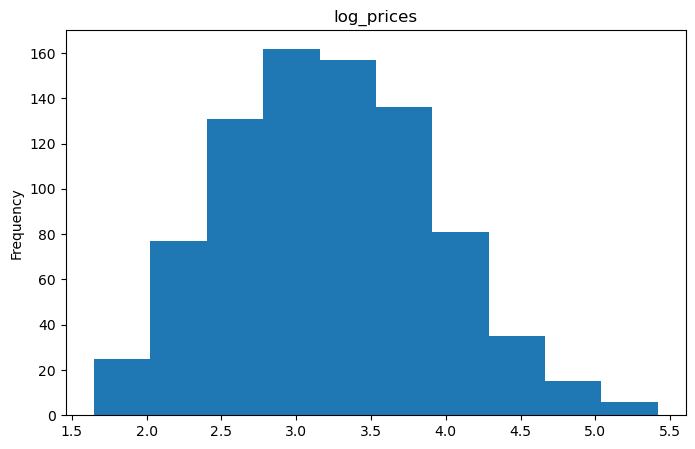

In [213]:
ax = erp.log_price.plot(kind='hist', figsize=(8, 5), title='log_prices')

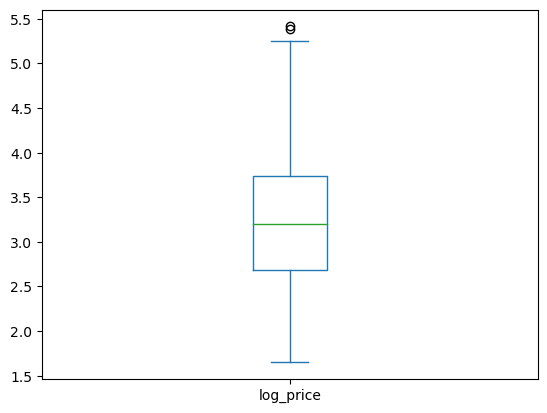

In [221]:
ax = erp.log_price.plot(kind='box')

In [215]:
df_stat['log_price']=stat(erp.log_price)
df_stat['log_price']=df_stat['log_price'].apply(lambda x:float('{:.4f}'.format(x)))
df_stat

,price,price_iqr,price_zscore,log_price
index,,,,
mean,32.4156,28.2565,29.8753,3.2231
mean_max,35.6572,31.0821,32.8629,3.5454
mean_min,29.1741,25.4308,26.8878,2.9008
median,24.4000,23.4000,24.0000,3.1946
trim_mean,29.1416,26.9785,28.0186,3.2104
skew_pvalue,0.0000,0.0000,0.0000,0.0044
kurt_pvalue,0.0000,0.1227,0.0000,0.0181
stddev,26.7796,17.5125,20.2528,0.7005
cv,0.8261,0.6198,0.6779,0.2173


In [216]:
mask_iqr=(erp.log_price<df_stat.loc['outlier_max_iqr','log_price'])&(erp.log_price>=df_stat.loc['outlier_min_iqr','log_price'])
mask_zscore=(erp.log_price<df_stat.loc['outlier_max_zscore','log_price'])&(erp.log_price>=df_stat.loc['outlier_min_zscore','log_price'])
num_outliers_iqr=erp[~mask_iqr].shape[0]
num_outliers_zscore=erp[~mask_zscore].shape[0]
num_outliers_iqr

2

In [217]:
num_outliers_zscore

2

In [1]:
df_stat['log_price_iqr']=stat(erp.log_price[mask_iqr])
df_stat['log_price_iqr']=df_stat['log_price_iqr'].apply(lambda x:float('{:.4f}'.format(x)))
df_stat['log_price_zscore']=stat(erp.log_price[mask_zscore])
df_stat['log_price_zscore']=df_stat['log_price_zscore'].apply(lambda x:float('{:.4f}'.format(x)))
df_stat

NameError: name 'stat' is not defined